<a href="https://colab.research.google.com/github/Jpra10/Python-para-Principiantes/blob/master/CLASE_Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

Las técnicas de clasificación son una parte esencial de las aplicaciones de aprendizaje automático y minería de datos. Aproximadamente el 70% de los problemas en Data Science son problemas de clasificación. Hay muchos problemas de clasificación disponibles, pero la regresión logística es común y es un método de regresión útil para resolver el problema de clasificación binaria.

La regresión logística se puede utilizar para varios problemas de clasificación, como la detección de spam. Predicción de la diabetes, si un cliente determinado comprará un producto en particular o abandonará a otro competidor, si el usuario hará clic en un enlace de publicidad determinado o no, y muchos más ejemplos.

La regresión logística es uno de los algoritmos de aprendizaje automático más simples y comúnmente utilizados para la clasificación de dos clases. Es fácil de implementar y se puede utilizar como base para cualquier problema de clasificación binaria. Sus conceptos básicos fundamentales también son constructivos en el aprendizaje profundo. La regresión logística describe y estima la relación entre una variable binaria dependiente y las variables independientes.



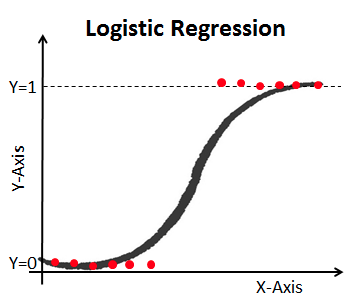

# Implementamos el método de Regresión Logística

***Clasificación***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
from google.colab import drive # CONECTAMOS AL DRIVE
drive.mount('/content/drive')

Mounted at /content/drive


Cargamos nuestra base de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
col_names = ['Embarazos','Glucosa','PresionArterial','GrosorPiel','Insulina','IMC','FuncPedigriDiabetes','Edad','Salida']
data = pd.read_csv("/content/drive/MyDrive/EDA -MACHINE LEARNING/ML/diabetes.csv", header=None, names=col_names)

In [5]:
data.head()

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncPedigriDiabetes,Edad,Salida
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Embarazos            768 non-null    int64  
 1   Glucosa              768 non-null    int64  
 2   PresionArterial      768 non-null    int64  
 3   GrosorPiel           768 non-null    int64  
 4   Insulina             768 non-null    int64  
 5   IMC                  768 non-null    float64
 6   FuncPedigriDiabetes  768 non-null    float64
 7   Edad                 768 non-null    int64  
 8   Salida               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncPedigriDiabetes,Edad,Salida
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data['Embarazos'].value_counts() #Concer 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Embarazos, dtype: int64

In [10]:
data['Salida'].value_counts()

0    500
1    268
Name: Salida, dtype: int64

#Construcción del modelo 

Variables independientes: Nos ayudan a hacer la predicción.

Variables dependientes: Variable de respuesta (datos etiquetados)

In [11]:
X = data[['Embarazos', 'Insulina', 'IMC', 'Edad','Glucosa','PresionArterial','FuncPedigriDiabetes']]# Features
y = data['Salida'] # Target variable

In [12]:
X.head()

,Embarazos,Insulina,IMC,Edad,Glucosa,PresionArterial,FuncPedigriDiabetes
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Salida, dtype: int64

Construimos lo conjuntos de datos de entrenamiento y de test

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) #random state: es la semilla que se genera números aleatorios. datos de entrenamiento de entrenamiento 75% y validación 25%.

In [15]:
X_train

,Embarazos,Insulina,IMC,Edad,Glucosa,PresionArterial,FuncPedigriDiabetes
762,9,0,22.5,33,89,62,0.142
127,1,94,33.3,23,118,58,0.261
564,0,0,32.4,27,91,80,0.601
375,12,325,39.2,58,140,82,0.528
663,9,130,37.9,40,145,80,0.637
...,...,...,...,...,...,...,...
763,10,180,32.9,63,101,76,0.171
192,7,0,30.4,36,159,66,0.383
629,4,0,24.7,21,94,65,0.148
559,11,0,30.1,35,85,74,0.300


In [16]:
y_train

762    0
127    0
564    0
375    1
663    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Salida, Length: 576, dtype: int64

In [17]:
X_test

,Embarazos,Insulina,IMC,Edad,Glucosa,PresionArterial,FuncPedigriDiabetes
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660
...,...,...,...,...,...,...,...
366,6,0,27.6,29,124,72,0.368
301,2,135,31.6,25,144,58,0.422
382,1,182,25.4,21,109,60,0.947
140,3,0,21.1,55,128,78,0.268


Cargamos el modelo de regresión logistica.

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [19]:
logreg

LogisticRegression()

In [20]:
X_test.head()

,Embarazos,Insulina,IMC,Edad,Glucosa,PresionArterial,FuncPedigriDiabetes
661,1,0,42.9,22,199,76,1.394
122,2,100,33.6,23,107,74,0.404
113,4,0,34.0,25,76,62,0.391
14,5,175,25.8,51,166,72,0.587
529,0,0,24.6,31,111,65,0.660


In [22]:
y.predid

AttributeError: ignored

In [23]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


In [25]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

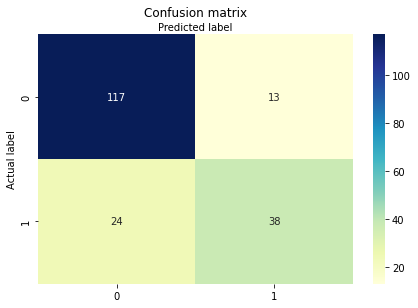

In [26]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Exactitud
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516


#Curva ROC

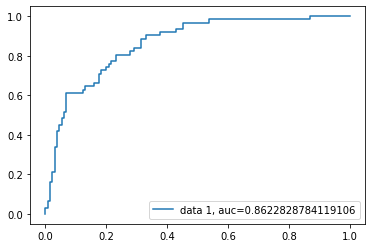

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [30]:
theme_light()

SyntaxError: ignored